# Exploratory data analysis, anomaly detection, imputation of bad/missing values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
xls = pd.ExcelFile("../data/Supplementary_Information_on_Assumptions_and_Results.xlsx")
input_df = pd.read_excel(xls, "LHS_multipliers", skiprows=3, index_col=0)
input_df = input_df.rename(mapper={'Unnamed: 1': 'SOW'}, axis=1)

In [3]:
input_df.columns

Index(['SOW', 'GDP', 'Population', 'Other Energy Service Demand Drivers',
       'Social discount rate',
       'Elasticity of energy service demand to its own driver',
       'Elasticity of energy service demand to its own price',
       'CO2 Storage Potential', 'Wind Potential', 'Solar Potential',
       'Biomass Potential', 'Oil & Gas Potential', 'Solar PV  Investment Cost',
       'Wind Investment Cost', 'Bioenergy with CCS Specific Investment Cost',
       'Other technologies costs', 'Forcing of non-energy emissions',
       'Land Use, Land Use Change and Forestry Sinks',
       'Climate Sensitivity (in oC)'],
      dtype='object')

In the input, we have the term 'SOW' (state of the world) which is a standard term in the literature. In our context, each SOW corresponds to a particular setting of many relevant
variables. 

We will rename "Monte Carlo Experiment" in the output to "SOW".

In [4]:
input_df.head()

,SOW,GDP,Population,Other Energy Service Demand Drivers,Social discount rate,Elasticity of energy service demand to its own driver,Elasticity of energy service demand to its own price,CO2 Storage Potential,Wind Potential,Solar Potential,Biomass Potential,Oil & Gas Potential,Solar PV Investment Cost,Wind Investment Cost,Bioenergy with CCS Specific Investment Cost,Other technologies costs,Forcing of non-energy emissions,"Land Use, Land Use Change and Forestry Sinks",Climate Sensitivity (in oC)
NaN,1,1.02329,1.009280,1.06310,3.70267,1.01302,1.216860,1.006150,0.971662,1.150920,1.135400,1.05784,1.11170,1.10379,0.819447,0.981384,0.998157,1.12255,3.4
NaN,2,1.03673,1.048020,1.09227,3.12322,0.94558,0.968287,1.041030,1.001220,1.113940,1.299140,1.07562,1.14355,1.07731,1.021290,1.072840,1.005780,1.05012,0.9
NaN,3,1.10540,1.036400,1.06594,4.67141,1.05255,1.114850,1.017850,0.988561,0.860595,0.938197,1.00949,1.13810,1.06507,1.022250,1.132540,1.032740,1.06746,6.1
NaN,4,1.19090,1.069190,1.06402,5.18396,1.04420,0.872730,1.110260,0.793212,1.295110,1.260430,1.13641,1.14283,1.12628,0.901399,1.051740,1.071810,1.10441,1.1
NaN,5,1.00481,0.997576,1.12753,3.46723,1.08794,1.118800,0.916675,0.833910,1.050770,1.117830,1.15528,1.11601,1.04754,1.046230,1.087450,0.889926,1.10180,3.3


In [5]:
output_df = pd.read_excel(xls, "MCA_Results_Global_1", skiprows=2, index_col=0)
output_df = output_df.rename(mapper={'Years': 'Year', 'Monte Carlo Experiment': 'SOW'}, axis=1)
output_df.columns

Index(['Year', 'Scenario', 'SOW', 'Temperature change (oC)',
       'Radiative Forcing (W/sqm)', 'CO2 concentrations (PPM)',
       'CH4 Concentrations (ppb)', 'N2O concentrations (ppb)', 'Carbon (Gt)',
       'CO2 (Gt-eq)', 'Marginal CO2 cost (USD/t)',
       'Global Total Electricity Supply (EJ/yr.)',
       'Global Electricty Supply from Bioenergy (EJ/yr.)',
       'Global Electricity Supply from Fossil Fuels (EJ/yr.)',
       'Global Electricity Supply from Geothermal (EJ/yr.)',
       'Global Electricity Supply from Nuclear (EJ/yr.)',
       'Global Electricity Supply from Solar (EJ/yr.)',
       'Global Electricity Supply from Tidal/Waves (EJ/yr.)',
       'Global Electricity Supply from Wind (EJ/yr.)',
       'Global Total Primary Energy Consumption (EJ/yr.)',
       'Global Primary Energy Consumption of Fossil Fuels (EJ/yr.)',
       'Global Primary Energy Consumption of Nuclear energy (EJ/yr.)',
       'Global Primary Energy Consumption of Renewable energy (EJ/yr.)',
       'A

In [6]:
output_df.head()

,Year,Scenario,SOW,Temperature change (oC),Radiative Forcing (W/sqm),CO2 concentrations (PPM),CH4 Concentrations (ppb),N2O concentrations (ppb),Carbon (Gt),CO2 (Gt-eq),...,Global Electricity Supply from Geothermal (EJ/yr.),Global Electricity Supply from Nuclear (EJ/yr.),Global Electricity Supply from Solar (EJ/yr.),Global Electricity Supply from Tidal/Waves (EJ/yr.),Global Electricity Supply from Wind (EJ/yr.),Global Total Primary Energy Consumption (EJ/yr.),Global Primary Energy Consumption of Fossil Fuels (EJ/yr.),Global Primary Energy Consumption of Nuclear energy (EJ/yr.),Global Primary Energy Consumption of Renewable energy (EJ/yr.),Annual Total Global Energy System Cost (Trillion USD)
NaN,2005,BASE_SSP2,1,0.904278,1.991927,381.589528,1769.654318,320.167548,8.088024,29.658784,...,0.055989,2.71066,0.002553,NaN,0.095885,482.388821,387.937231,29.570839,64.880752,4.09223
NaN,2005,BASE_SSP2,2,0.791192,1.991927,381.589528,1769.654318,320.167548,8.088024,29.658784,...,0.055989,2.71066,0.002553,NaN,0.095885,482.388821,387.937231,29.570839,64.880752,4.09223
NaN,2005,BASE_SSP2,3,0.922298,1.991927,381.589528,1769.654318,320.167548,8.088024,29.658784,...,0.055989,2.71066,0.002553,NaN,0.095885,482.388821,387.937231,29.570839,64.880752,4.09223
NaN,2005,BASE_SSP2,4,0.819155,1.991927,381.589528,1769.654318,320.167548,8.088024,29.658784,...,0.055989,2.71066,0.002553,NaN,0.095885,482.388821,387.937231,29.570839,64.880752,4.09223
NaN,2005,BASE_SSP2,5,0.903044,1.991927,381.589528,1769.654318,320.167548,8.088024,29.658784,...,0.055989,2.71066,0.002553,NaN,0.095885,482.388821,387.937231,29.570839,64.880752,4.09223


# Redundant variable? No.

There are two variables which are almost a linear scaling of each other. Later in the process this allclose() is True, but here it is False. Confirmed the CO2 is a CO2 equivalent figure, including methane etc, not just CO2. Thus they are not truly redundant.

In [7]:
ratio = (output_df['Carbon (Gt)'] / output_df['CO2 (Gt-eq)'])
print(ratio.mean(), ratio.std(), np.allclose(ratio, 0.2727)) # this is close the ratio of molecular weights of C versus CO2

0.2727024734520097 1.7055891464848739e-06 False


## Some useful variables

For Scenarios and Years, it's useful to bring them out as their own variables as we'll do things like iterate over them later.

In [8]:
# four scenarios: base, 1.5C warming limit, 2C warming limit, 
# 2C warming limit with delayed action (DA) 30 years
# (relative to 1990)

# we prefer to keep them in this order:
scenarios = ['BASE_SSP2', '1p5c_OS_SSP2', '2C_SSP2', '2C_SSP2_DA30']

# confirm we have the right ones in the data
assert set(scenarios) == set(output_df['Scenario']) 

In [9]:
years = sorted(list(set(output_df["Year"].values)))
years

[2005, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]

# Missing SOWs

Some SOWs seem to be missing from the output. 1000 SOWs are defined in the input, and there are 4 scenarios, so we would expect 4000 rows the output per year. But it only contains 3994.

In [10]:
for year in years:
    print(f"{year} contains {len(output_df[output_df['Year'] == year])} rows") # we would expect 4 scenarios x 1000 SOWs

2005 contains 3994 rows
2010 contains 3994 rows
2020 contains 3994 rows
2030 contains 3994 rows
2040 contains 3994 rows
2050 contains 3994 rows
2060 contains 3994 rows
2070 contains 3994 rows
2080 contains 3994 rows
2090 contains 3994 rows
2100 contains 3994 rows


# Check for NA values

There are also some NA values for particular variables in the output, but not in the input.

In [11]:
input_df.isnull().any().any()

False

In [12]:
output_df.isnull().any().any()

True

We see that some of the variables in the output have many null values:

In [13]:
output_df.isnull().sum()

Year                                                                  0
Scenario                                                              0
SOW                                                                   0
Temperature change (oC)                                               0
Radiative Forcing (W/sqm)                                             0
CO2 concentrations (PPM)                                              0
CH4 Concentrations (ppb)                                              0
N2O concentrations (ppb)                                              0
Carbon (Gt)                                                           0
CO2 (Gt-eq)                                                           0
Marginal CO2 cost (USD/t)                                         21129
Global Total Electricity Supply (EJ/yr.)                              0
Global Electricty Supply from Bioenergy (EJ/yr.)                  25098
Global Electricity Supply from Fossil Fuels (EJ/yr.)            

The missing values are across all scenarios and all SOWs. However different variables have NAs for different years:

In [14]:
for c in ['Marginal CO2 cost (USD/t)', 
          'Global Electricty Supply from Bioenergy (EJ/yr.)',
          'Global Electricity Supply from Tidal/Waves (EJ/yr.)']:
    missing = output_df[output_df[c].isnull()]
    print(f"Number of NA values for {c}: {missing.shape[0]}")
    print(f"Years with NA values for {c}: {sorted(list(set(missing['Year'])))}")
    print(f"Number of SOWs with NA values for {c}: {len(set(missing['SOW']))}")
    print(f"Number of SOWs with NA values for {c} at 2050: {len(set(missing[missing['Year'] == 2050]['SOW']))}")
    print(f"Scenarios with NA values for {c}: {set(missing['Scenario'])}")
    print("")

Number of NA values for Marginal CO2 cost (USD/t): 21129
Years with NA values for Marginal CO2 cost (USD/t): [2005, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
Number of SOWs with NA values for Marginal CO2 cost (USD/t): 1000
Number of SOWs with NA values for Marginal CO2 cost (USD/t) at 2050: 999
Scenarios with NA values for Marginal CO2 cost (USD/t): {'1p5c_OS_SSP2', '2C_SSP2', '2C_SSP2_DA30', 'BASE_SSP2'}

Number of NA values for Global Electricty Supply from Bioenergy (EJ/yr.): 25098
Years with NA values for Global Electricty Supply from Bioenergy (EJ/yr.): [2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
Number of SOWs with NA values for Global Electricty Supply from Bioenergy (EJ/yr.): 1000
Number of SOWs with NA values for Global Electricty Supply from Bioenergy (EJ/yr.) at 2050: 1000
Scenarios with NA values for Global Electricty Supply from Bioenergy (EJ/yr.): {'1p5c_OS_SSP2', '2C_SSP2', '2C_SSP2_DA30', 'BASE_SSP2'}

Number of NA values for Global Electricity S

It seems the Tidal variable is ok after 2010, while the Marginal CO2 cost and Bioenergy variables are not. We are going to focus on 2050 only. So we can retain the Tidal variable but could remove the others.

# Negative global costs

For one SOW, the global cost is negative in a particular scenario in several years.

In [15]:
output_df[output_df['Annual Total Global Energy System Cost (Trillion USD)'] < 0][
    ['Year', 'Scenario', 'SOW', 'Annual Total Global Energy System Cost (Trillion USD)']
]

,Year,Scenario,SOW,Annual Total Global Energy System Cost (Trillion USD)
NaN,2030,2C_SSP2,31,-62.255665
NaN,2050,2C_SSP2,31,-878.252058
NaN,2060,2C_SSP2,31,-132.854488
NaN,2080,2C_SSP2,31,-881.615823
NaN,2090,2C_SSP2,31,-52.522651


## Dealing with this bad data

So there are three things that seem to go wrong:

1. For a few SOWs, perhaps the original simulation model fails to converge. We have missing rows. For fair comparisons, we should drop these SOWs completely.
2. For one SOW, the global cost is negative. We should drop this SOW completely.
3. Some output variables are NA in 2050. We should drop these variables completely.



In [16]:
bad_SOWs = set()

In [17]:
df = output_df
for year in years:
    df_year = df[(df['Year'] == year)]
    for scenario in scenarios:        
        for SOW in range(1, 1001):
            df_yss = df_year[(df_year['Scenario'] == scenario) & (df_year['SOW'] == SOW)]
            if len(df_yss) != 1:
                print(f'{year} {scenario} SOW {SOW} does not exist')
                bad_SOWs.add(SOW)
            elif (df_yss['Annual Total Global Energy System Cost (Trillion USD)'] < 0).any():
                print(f'{year} {scenario} SOW {SOW} has a negative global cost')
                bad_SOWs.add(SOW)
            #if df.isna().any().any():
            #    print('some NANs')


2005 BASE_SSP2 SOW 946 does not exist
2005 2C_SSP2 SOW 579 does not exist
2005 2C_SSP2 SOW 753 does not exist
2005 2C_SSP2_DA30 SOW 472 does not exist
2005 2C_SSP2_DA30 SOW 607 does not exist
2005 2C_SSP2_DA30 SOW 627 does not exist
2010 BASE_SSP2 SOW 946 does not exist
2010 2C_SSP2 SOW 579 does not exist
2010 2C_SSP2 SOW 753 does not exist
2010 2C_SSP2_DA30 SOW 472 does not exist
2010 2C_SSP2_DA30 SOW 607 does not exist
2010 2C_SSP2_DA30 SOW 627 does not exist
2020 BASE_SSP2 SOW 946 does not exist
2020 2C_SSP2 SOW 579 does not exist
2020 2C_SSP2 SOW 753 does not exist
2020 2C_SSP2_DA30 SOW 472 does not exist
2020 2C_SSP2_DA30 SOW 607 does not exist
2020 2C_SSP2_DA30 SOW 627 does not exist
2030 BASE_SSP2 SOW 946 does not exist
2030 2C_SSP2 SOW 31 has a negative global cost
2030 2C_SSP2 SOW 579 does not exist
2030 2C_SSP2 SOW 753 does not exist
2030 2C_SSP2_DA30 SOW 472 does not exist
2030 2C_SSP2_DA30 SOW 607 does not exist
2030 2C_SSP2_DA30 SOW 627 does not exist
2040 BASE_SSP2 SOW 94

In [18]:
bad_SOWs

{31, 472, 579, 607, 627, 753, 946}

In [19]:
# remove the bad SOWs
output_df = output_df[~output_df['SOW'].isin(bad_SOWs)]
input_df = input_df[~input_df['SOW'].isin(bad_SOWs)]

Let's check on the shapes now.

In [20]:
print(input_df.shape)
print(output_df.shape)


(993, 19)
(43692, 24)


In [21]:
for year in sorted(set(output_df["Year"].values)):
    print(f'{year}: {len(output_df[output_df["Year"] == year])}')

2005: 3972
2010: 3972
2020: 3972
2030: 3972
2040: 3972
2050: 3972
2060: 3972
2070: 3972
2080: 3972
2090: 3972
2100: 3972


# Focus on 2050

In [22]:
output_df = output_df[(output_df['Year'] == 2050)]

### Join the input and output dfs

The input has 993 SOWs. The output has 993 SOWs x 4 scenarios. We tile the input and join.

In [23]:
Xs = []
for scenario in scenarios:
    Xnew = input_df.copy()
    Xnew['Scenario'] = scenario
    Xs.append(Xnew)
XX = pd.concat(Xs)
XX

,SOW,GDP,Population,Other Energy Service Demand Drivers,Social discount rate,Elasticity of energy service demand to its own driver,Elasticity of energy service demand to its own price,CO2 Storage Potential,Wind Potential,Solar Potential,Biomass Potential,Oil & Gas Potential,Solar PV Investment Cost,Wind Investment Cost,Bioenergy with CCS Specific Investment Cost,Other technologies costs,Forcing of non-energy emissions,"Land Use, Land Use Change and Forestry Sinks",Climate Sensitivity (in oC),Scenario
NaN,1,1.023290,1.009280,1.063100,3.70267,1.013020,1.216860,1.006150,0.971662,1.150920,1.135400,1.057840,1.111700,1.10379,0.819447,0.981384,0.998157,1.12255,3.4,BASE_SSP2
NaN,2,1.036730,1.048020,1.092270,3.12322,0.945580,0.968287,1.041030,1.001220,1.113940,1.299140,1.075620,1.143550,1.07731,1.021290,1.072840,1.005780,1.05012,0.9,BASE_SSP2
NaN,3,1.105400,1.036400,1.065940,4.67141,1.052550,1.114850,1.017850,0.988561,0.860595,0.938197,1.009490,1.138100,1.06507,1.022250,1.132540,1.032740,1.06746,6.1,BASE_SSP2
NaN,4,1.190900,1.069190,1.064020,5.18396,1.044200,0.872730,1.110260,0.793212,1.295110,1.260430,1.136410,1.142830,1.12628,0.901399,1.051740,1.071810,1.10441,1.1,BASE_SSP2
NaN,5,1.004810,0.997576,1.127530,3.46723,1.087940,1.118800,0.916675,0.833910,1.050770,1.117830,1.155280,1.116010,1.04754,1.046230,1.087450,0.889926,1.10180,3.3,BASE_SSP2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,996,1.184730,0.976916,1.082210,2.59491,1.100430,1.000910,1.129240,0.926226,1.112010,1.021050,0.961653,1.113420,1.01733,0.917685,0.958691,1.019160,1.03215,3.5,2C_SSP2_DA30
NaN,997,1.055090,0.973555,1.041740,4.62148,0.980458,1.172190,0.882206,0.934135,1.048540,1.107190,0.949759,0.905206,1.23572,1.130140,0.988741,1.028070,1.17653,3.0,2C_SSP2_DA30
NaN,998,0.935864,0.970352,0.940245,4.59565,1.037470,1.027760,0.935585,1.111980,1.006970,1.174590,1.036520,0.956684,1.08719,1.157300,1.049560,0.978227,1.01122,3.7,2C_SSP2_DA30
NaN,999,1.148170,0.998990,1.172490,3.75219,1.139170,1.112980,0.897610,0.929995,1.194730,1.001230,1.073940,1.070510,0.99485,1.024860,1.137480,0.974531,1.06105,3.7,2C_SSP2_DA30


# Encode scenarios numerically

The four scenarios can be encoded with two meaningful variables. This might be a useful thing to do, to use them in regression instead of the categorical scenario variable. Or it might not. Or the best approach might be to create separate regression models for the separate scenarios. For now we'll create these new encodings.

In [24]:
def create_temperature_limit(row):
    if   row['Scenario'] == '1p5c_OS_SSP2': return 1.5 # degrees
    elif row['Scenario'] == '2C_SSP2':      return 2.0
    elif row['Scenario'] == '2C_SSP2_DA30': return 2.0
    elif row['Scenario'] == 'BASE_SSP2':    return 8.0 # smiley face
    else: raise ValueError

def create_delay(row):
    if   row['Scenario'] == '1p5c_OS_SSP2': return 15 # years
    elif row['Scenario'] == '2C_SSP2':      return 15
    elif row['Scenario'] == '2C_SSP2_DA30': return 25
    elif row['Scenario'] == 'BASE_SSP2':    return 0
    else: raise ValueError

In [25]:
temp_limit = XX.apply(create_temperature_limit, axis=1)
delay = XX.apply(create_delay, axis=1)
XX.insert(1, 'Temperature Limit', temp_limit)
XX.insert(2, 'Delayed Action', delay)

In [26]:
XX.columns 

Index(['SOW', 'Temperature Limit', 'Delayed Action', 'GDP', 'Population',
       'Other Energy Service Demand Drivers', 'Social discount rate',
       'Elasticity of energy service demand to its own driver',
       'Elasticity of energy service demand to its own price',
       'CO2 Storage Potential', 'Wind Potential', 'Solar Potential',
       'Biomass Potential', 'Oil & Gas Potential', 'Solar PV  Investment Cost',
       'Wind Investment Cost', 'Bioenergy with CCS Specific Investment Cost',
       'Other technologies costs', 'Forcing of non-energy emissions',
       'Land Use, Land Use Change and Forestry Sinks',
       'Climate Sensitivity (in oC)', 'Scenario'],
      dtype='object')

In [27]:
XX = XX.set_index(["Scenario", "SOW"])

In [28]:
print(XX.shape)
XX.head()

(3972, 20)


Temperature Limit  Delayed Action      GDP  Population  \
Scenario  SOW                                                           
BASE_SSP2 1                  8.0               0  1.02329    1.009280   
          2                  8.0               0  1.03673    1.048020   
          3                  8.0               0  1.10540    1.036400   
          4                  8.0               0  1.19090    1.069190   
          5                  8.0               0  1.00481    0.997576   

               Other Energy Service Demand Drivers  Social discount rate  \
Scenario  SOW                                                              
BASE_SSP2 1                                1.06310               3.70267   
          2                                1.09227               3.12322   
          3                                1.06594               4.67141   
          4                                1.06402               5.18396   
          5                                1.12753               3.46723   

               Elasticity of energy service demand to its own driver  \
Scenario  SOW                                                          
BASE_SSP2 1                                              1.01302       
          2                                              0.94558       
          3                                              1.05255       
          4                                              1.04420       
          5                                              1.08794       

               Elasticity of energy service demand to its own price  \
Scenario  SOW                                                         
BASE_SSP2 1                                             1.216860      
          2                                             0.968287      
          3                                             1.114850      
          4                                             0.872730      
          5                                             1.118800      

               CO2 Storage Potential  Wind Potential  Solar Potential  \
Scenario  SOW                                                           
BASE_SSP2 1                 1.006150        0.971662         1.150920   
          2                 1.041030        1.001220         1.113940   
          3                 1.017850        0.988561         0.860595   
          4                 1.110260        0.793212         1.295110   
          5                 0.916675        0.833910         1.050770   

               Biomass Potential  Oil & Gas Potential  \
Scenario  SOW                                           
BASE_SSP2 1             1.135400              1.05784   
          2             1.299140              1.07562   
          3             0.938197              1.00949   
          4             1.260430              1.13641   
          5             1.117830              1.15528   

               Solar PV  Investment Cost  Wind Investment Cost  \
Scenario  SOW                                                    
BASE_SSP2 1                      1.11170               1.10379   
          2                      1.14355               1.07731   
          3                      1.13810               1.06507   
          4                      1.14283               1.12628   
          5                      1.11601               1.04754   

               Bioenergy with CCS Specific Investment Cost  \
Scenario  SOW                                                
BASE_SSP2 1                                       0.819447   
          2                                       1.021290   
          3                                       1.022250   
          4                                       0.901399   
          5                                       1.046230   

               Other technologies costs  Forcing of non-energy emissions  \
Scenario  SOW                                                              
BASE_

In [29]:
y = output_df # [['Scenario', 'Monte Carlo Experiment', 'Annual Total Global Energy System Cost (Trillion USD)']]
y = y.set_index(["Scenario", "SOW"])
print(y.shape)
y.head()

(3972, 22)


Year  Temperature change (oC)  Radiative Forcing (W/sqm)  \
Scenario  SOW                                                             
BASE_SSP2 1    2050                 2.492372                   4.098255   
          2    2050                 0.888077                   4.033615   
          3    2050                 3.390103                   4.207768   
          4    2050                 1.100066                   4.234404   
          5    2050                 2.465955                   4.156493   

               CO2 concentrations (PPM)  CH4 Concentrations (ppb)  \
Scenario  SOW                                                       
BASE_SSP2 1                  512.426979               2422.045287   
          2                  506.380331               2406.713758   
          3                  522.855378               2441.623875   
          4                  524.827425               2464.192620   
          5                  517.928190               2434.152374   

               N2O concentrations (ppb)  Carbon (Gt)  CO2 (Gt-eq)  \
Scenario  SOW                                                       
BASE_SSP2 1                  374.607500    11.105361    40.723358   
          2                  374.520378    10.063334    36.902246   
          3                  374.788027    12.851788    47.127506   
          4                  374.911188    13.025830    47.765720   
          5                  374.680736    12.141760    44.523833   

               Marginal CO2 cost (USD/t)  \
Scenario  SOW                              
BASE_SSP2 1                          NaN   
          2                          NaN   
          3                          NaN   
          4                          NaN   
          5                          NaN   

               Global Total Electricity Supply (EJ/yr.)  ...  \
Scenario  SOW                                            ...   
BASE_SSP2 1                                   32.331278  ...   
          2                                   30.576572  ...   
          3                                   35.834274  ...   
          4                                   36.532440  ...   
          5                                   35.611661  ...   

               Global Electricity Supply from Geothermal (EJ/yr.)  \
Scenario  SOW                                                       
BASE_SSP2 1                                             1.907061    
          2                                             1.906060    
          3                                             1.931578    
          4                                             1.937528    
          5                                             1.915827    

               Global Electricity Supply from Nuclear (EJ/yr.)  \
Scenario  SOW                                                    
BASE_SSP2 1                                           4.167604   
          2                                           4.102991   
          3                                           4.383345   
          4                                           4.148554   
          5                                           4.226128   

               Global Electricity Supply from Solar (EJ/yr.)  \
Scenario  SOW                                                  
BASE_SSP2 1                                         5.115586   
          2                                         4.179275   
          3                                         5.704254   
          4                                         6.287348   
          5                                         5.810294   

               Global Electricity Supply from Tidal/Waves (EJ/yr.)  \
Scenario  SOW                                                        
BASE_SSP2 1                                             2.424417     
          2                                             2.396469     
          3                                             2.508125     
          4      

In [30]:
XX.head()

Temperature Limit  Delayed Action      GDP  Population  \
Scenario  SOW                                                           
BASE_SSP2 1                  8.0               0  1.02329    1.009280   
          2                  8.0               0  1.03673    1.048020   
          3                  8.0               0  1.10540    1.036400   
          4                  8.0               0  1.19090    1.069190   
          5                  8.0               0  1.00481    0.997576   

               Other Energy Service Demand Drivers  Social discount rate  \
Scenario  SOW                                                              
BASE_SSP2 1                                1.06310               3.70267   
          2                                1.09227               3.12322   
          3                                1.06594               4.67141   
          4                                1.06402               5.18396   
          5                                1.12753               3.46723   

               Elasticity of energy service demand to its own driver  \
Scenario  SOW                                                          
BASE_SSP2 1                                              1.01302       
          2                                              0.94558       
          3                                              1.05255       
          4                                              1.04420       
          5                                              1.08794       

               Elasticity of energy service demand to its own price  \
Scenario  SOW                                                         
BASE_SSP2 1                                             1.216860      
          2                                             0.968287      
          3                                             1.114850      
          4                                             0.872730      
          5                                             1.118800      

               CO2 Storage Potential  Wind Potential  Solar Potential  \
Scenario  SOW                                                           
BASE_SSP2 1                 1.006150        0.971662         1.150920   
          2                 1.041030        1.001220         1.113940   
          3                 1.017850        0.988561         0.860595   
          4                 1.110260        0.793212         1.295110   
          5                 0.916675        0.833910         1.050770   

               Biomass Potential  Oil & Gas Potential  \
Scenario  SOW                                           
BASE_SSP2 1             1.135400              1.05784   
          2             1.299140              1.07562   
          3             0.938197              1.00949   
          4             1.260430              1.13641   
          5             1.117830              1.15528   

               Solar PV  Investment Cost  Wind Investment Cost  \
Scenario  SOW                                                    
BASE_SSP2 1                      1.11170               1.10379   
          2                      1.14355               1.07731   
          3                      1.13810               1.06507   
          4                      1.14283               1.12628   
          5                      1.11601               1.04754   

               Bioenergy with CCS Specific Investment Cost  \
Scenario  SOW                                                
BASE_SSP2 1                                       0.819447   
          2                                       1.021290   
          3                                       1.022250   
          4                                       0.901399   
          5                                       1.046230   

               Other technologies costs  Forcing of non-energy emissions  \
Scenario  SOW                                                              
BASE_

In [31]:
y.head()

Year  Temperature change (oC)  Radiative Forcing (W/sqm)  \
Scenario  SOW                                                             
BASE_SSP2 1    2050                 2.492372                   4.098255   
          2    2050                 0.888077                   4.033615   
          3    2050                 3.390103                   4.207768   
          4    2050                 1.100066                   4.234404   
          5    2050                 2.465955                   4.156493   

               CO2 concentrations (PPM)  CH4 Concentrations (ppb)  \
Scenario  SOW                                                       
BASE_SSP2 1                  512.426979               2422.045287   
          2                  506.380331               2406.713758   
          3                  522.855378               2441.623875   
          4                  524.827425               2464.192620   
          5                  517.928190               2434.152374   

               N2O concentrations (ppb)  Carbon (Gt)  CO2 (Gt-eq)  \
Scenario  SOW                                                       
BASE_SSP2 1                  374.607500    11.105361    40.723358   
          2                  374.520378    10.063334    36.902246   
          3                  374.788027    12.851788    47.127506   
          4                  374.911188    13.025830    47.765720   
          5                  374.680736    12.141760    44.523833   

               Marginal CO2 cost (USD/t)  \
Scenario  SOW                              
BASE_SSP2 1                          NaN   
          2                          NaN   
          3                          NaN   
          4                          NaN   
          5                          NaN   

               Global Total Electricity Supply (EJ/yr.)  ...  \
Scenario  SOW                                            ...   
BASE_SSP2 1                                   32.331278  ...   
          2                                   30.576572  ...   
          3                                   35.834274  ...   
          4                                   36.532440  ...   
          5                                   35.611661  ...   

               Global Electricity Supply from Geothermal (EJ/yr.)  \
Scenario  SOW                                                       
BASE_SSP2 1                                             1.907061    
          2                                             1.906060    
          3                                             1.931578    
          4                                             1.937528    
          5                                             1.915827    

               Global Electricity Supply from Nuclear (EJ/yr.)  \
Scenario  SOW                                                    
BASE_SSP2 1                                           4.167604   
          2                                           4.102991   
          3                                           4.383345   
          4                                           4.148554   
          5                                           4.226128   

               Global Electricity Supply from Solar (EJ/yr.)  \
Scenario  SOW                                                  
BASE_SSP2 1                                         5.115586   
          2                                         4.179275   
          3                                         5.704254   
          4                                         6.287348   
          5                                         5.810294   

               Global Electricity Supply from Tidal/Waves (EJ/yr.)  \
Scenario  SOW                                                        
BASE_SSP2 1                                             2.424417     
          2                                             2.396469     
          3                                             2.508125     
          4      

In [32]:
XX.shape

(3972, 20)

In [33]:
y.shape

(3972, 22)

In [34]:
Xy = XX.join(y, on=['Scenario', 'SOW'])

In [35]:
Xy.head()

Temperature Limit  Delayed Action      GDP  Population  \
Scenario  SOW                                                           
BASE_SSP2 1                  8.0               0  1.02329    1.009280   
          2                  8.0               0  1.03673    1.048020   
          3                  8.0               0  1.10540    1.036400   
          4                  8.0               0  1.19090    1.069190   
          5                  8.0               0  1.00481    0.997576   

               Other Energy Service Demand Drivers  Social discount rate  \
Scenario  SOW                                                              
BASE_SSP2 1                                1.06310               3.70267   
          2                                1.09227               3.12322   
          3                                1.06594               4.67141   
          4                                1.06402               5.18396   
          5                                1.12753               3.46723   

               Elasticity of energy service demand to its own driver  \
Scenario  SOW                                                          
BASE_SSP2 1                                              1.01302       
          2                                              0.94558       
          3                                              1.05255       
          4                                              1.04420       
          5                                              1.08794       

               Elasticity of energy service demand to its own price  \
Scenario  SOW                                                         
BASE_SSP2 1                                             1.216860      
          2                                             0.968287      
          3                                             1.114850      
          4                                             0.872730      
          5                                             1.118800      

               CO2 Storage Potential  Wind Potential  ...  \
Scenario  SOW                                         ...   
BASE_SSP2 1                 1.006150        0.971662  ...   
          2                 1.041030        1.001220  ...   
          3                 1.017850        0.988561  ...   
          4                 1.110260        0.793212  ...   
          5                 0.916675        0.833910  ...   

               Global Electricity Supply from Geothermal (EJ/yr.)  \
Scenario  SOW                                                       
BASE_SSP2 1                                             1.907061    
          2                                             1.906060    
          3                                             1.931578    
          4                                             1.937528    
          5                                             1.915827    

               Global Electricity Supply from Nuclear (EJ/yr.)  \
Scenario  SOW                                                    
BASE_SSP2 1                                           4.167604   
          2                                           4.102991   
          3                                           4.383345   
          4                                           4.148554   
          5                                           4.226128   

               Global Electricity Supply from Solar (EJ/yr.)  \
Scenario  SOW                                                  
BASE_SSP2 1                                         5.115586   
          2                                         4.179275   
          3                                         5.704254   
          4                                         6.287348   
          5                                         5.810294   

               Global Electricity Supply from Tidal/Waves (EJ/yr.)  \
Scenario  SOW                                                        
BAS

In [36]:
Xy = Xy.reset_index()
Xy.columns

Index(['Scenario', 'SOW', 'Temperature Limit', 'Delayed Action', 'GDP',
       'Population', 'Other Energy Service Demand Drivers',
       'Social discount rate',
       'Elasticity of energy service demand to its own driver',
       'Elasticity of energy service demand to its own price',
       'CO2 Storage Potential', 'Wind Potential', 'Solar Potential',
       'Biomass Potential', 'Oil & Gas Potential', 'Solar PV  Investment Cost',
       'Wind Investment Cost', 'Bioenergy with CCS Specific Investment Cost',
       'Other technologies costs', 'Forcing of non-energy emissions',
       'Land Use, Land Use Change and Forestry Sinks',
       'Climate Sensitivity (in oC)', 'Year', 'Temperature change (oC)',
       'Radiative Forcing (W/sqm)', 'CO2 concentrations (PPM)',
       'CH4 Concentrations (ppb)', 'N2O concentrations (ppb)', 'Carbon (Gt)',
       'CO2 (Gt-eq)', 'Marginal CO2 cost (USD/t)',
       'Global Total Electricity Supply (EJ/yr.)',
       'Global Electricty Supply from Bio

In [37]:
Xy.head()

,Scenario,SOW,Temperature Limit,Delayed Action,GDP,Population,Other Energy Service Demand Drivers,Social discount rate,Elasticity of energy service demand to its own driver,Elasticity of energy service demand to its own price,...,Global Electricity Supply from Geothermal (EJ/yr.),Global Electricity Supply from Nuclear (EJ/yr.),Global Electricity Supply from Solar (EJ/yr.),Global Electricity Supply from Tidal/Waves (EJ/yr.),Global Electricity Supply from Wind (EJ/yr.),Global Total Primary Energy Consumption (EJ/yr.),Global Primary Energy Consumption of Fossil Fuels (EJ/yr.),Global Primary Energy Consumption of Nuclear energy (EJ/yr.),Global Primary Energy Consumption of Renewable energy (EJ/yr.),Annual Total Global Energy System Cost (Trillion USD)
0,BASE_SSP2,1,8.0,0,1.02329,1.009280,1.06310,3.70267,1.01302,1.216860,...,1.907061,4.167604,5.115586,2.424417,5.161512,812.092289,539.893683,43.075844,229.122762,24.788425
1,BASE_SSP2,2,8.0,0,1.03673,1.048020,1.09227,3.12322,0.94558,0.968287,...,1.906060,4.102991,4.179275,2.396469,4.874241,767.103047,487.040394,42.410591,237.652063,23.041618
2,BASE_SSP2,3,8.0,0,1.10540,1.036400,1.06594,4.67141,1.05255,1.114850,...,1.931578,4.383345,5.704254,2.508125,6.629379,891.257378,629.014809,45.297113,216.945456,27.872416
3,BASE_SSP2,4,8.0,0,1.19090,1.069190,1.06402,5.18396,1.04420,0.872730,...,1.937528,4.148554,6.287348,2.475500,5.821404,934.818295,642.963633,42.879712,248.974949,29.159699
4,BASE_SSP2,5,8.0,0,1.00481,0.997576,1.12753,3.46723,1.08794,1.118800,...,1.915827,4.226128,5.810294,2.516766,6.502266,874.573547,592.973597,43.678409,237.921540,26.175837


In [38]:
for col in Xy.columns:
    print(f'{col}: {len(set(Xy[col].values))}')

Scenario: 4
SOW: 993
Temperature Limit: 3
Delayed Action: 3
GDP: 993
Population: 993
Other Energy Service Demand Drivers: 993
Social discount rate: 993
Elasticity of energy service demand to its own driver: 993
Elasticity of energy service demand to its own price: 993
CO2 Storage Potential: 993
Wind Potential: 993
Solar Potential: 993
Biomass Potential: 993
Oil & Gas Potential: 992
Solar PV  Investment Cost: 993
Wind Investment Cost: 993
Bioenergy with CCS Specific Investment Cost: 993
Other technologies costs: 993
Forcing of non-energy emissions: 993
Land Use, Land Use Change and Forestry Sinks: 993
Climate Sensitivity (in oC): 86
Year: 1
Temperature change (oC): 3826
Radiative Forcing (W/sqm): 3972
CO2 concentrations (PPM): 3972
CH4 Concentrations (ppb): 3972
N2O concentrations (ppb): 3972
Carbon (Gt): 3972
CO2 (Gt-eq): 3972
Marginal CO2 cost (USD/t): 3960
Global Total Electricity Supply (EJ/yr.): 3972
Global Electricty Supply from Bioenergy (EJ/yr.): 3972
Global Electricity Supply f

In [39]:
Xy.isna().any()

Scenario                                                          False
SOW                                                               False
Temperature Limit                                                 False
Delayed Action                                                    False
GDP                                                               False
Population                                                        False
Other Energy Service Demand Drivers                               False
Social discount rate                                              False
Elasticity of energy service demand to its own driver             False
Elasticity of energy service demand to its own price              False
CO2 Storage Potential                                             False
Wind Potential                                                    False
Solar Potential                                                   False
Biomass Potential                                               

# Rename columns

And save a file with the renames for later use.

In [40]:
renames = {
    'Scenario': 'Scenario', 
    'SOW': 'SOW', 
    'Temperature Limit': 'Temp_Limit', 
    'Delayed Action': 'Delay', 
    'GDP': 'GDP',
    'Population': 'Pop', 
    'Other Energy Service Demand Drivers': 'Other_ESD_Drivers',
    'Social discount rate': 'SDR',
    'Elasticity of energy service demand to its own driver': 'Elast_ESD_Driver',
    'Elasticity of energy service demand to its own price': 'Elast_ESD_Price',
    'CO2 Storage Potential': 'CO2_Storage_Poten', 
    'Wind Potential': 'Wind_Poten', 
    'Solar Potential': 'Solar_Poten',
    'Biomass Potential': 'Biomass_Poten', 
    'Oil & Gas Potential': 'Oil_Gas_Poten', 
    'Solar PV  Investment Cost': 'Solar_PV_Inv_Cost',
    'Wind Investment Cost': 'Wind_Inv_Cost', 
    'Bioenergy with CCS Specific Investment Cost': 'Bioenergy_CCS_Inv_Cost',
    'Other technologies costs': 'Other_Tech_Cost', 
    'Forcing of non-energy emissions': 'Forcing',
    'Land Use, Land Use Change and Forestry Sinks': 'Land_Sinks',
    'Climate Sensitivity (in oC)': 'Clim_Sens', 
    'Year': 'Year',
    'Temperature change (oC)': 'Temp_Change',
    'Radiative Forcing (W/sqm)': 'Rad_Forcing',
    'CO2 concentrations (PPM)': 'CO2_Conc',
    'CH4 Concentrations (ppb)': 'CH4_Conc', 
    'N2O concentrations (ppb)': 'N20_Conc', 
    'Carbon (Gt)': 'Carbon',
    'CO2 (Gt-eq)': 'CO2eq', 
    'Marginal CO2 cost (USD/t)': 'Marg_CO2_Cost',
    'Global Total Electricity Supply (EJ/yr.)': 'GSupply',
    'Global Electricty Supply from Bioenergy (EJ/yr.)': 'GSupply_Bioenergy',
    'Global Electricity Supply from Fossil Fuels (EJ/yr.)': 'GSupply_Fossil',
    'Global Electricity Supply from Geothermal (EJ/yr.)': 'GSupply_Geothermal',
    'Global Electricity Supply from Nuclear (EJ/yr.)': 'GSupply_Nuclear',
    'Global Electricity Supply from Solar (EJ/yr.)': 'GSupply_Solar',
    'Global Electricity Supply from Tidal/Waves (EJ/yr.)': 'GSupply_Tidal_Waves',
    'Global Electricity Supply from Wind (EJ/yr.)': 'GSupply_Wind',
    'Global Total Primary Energy Consumption (EJ/yr.)': 'GConsumption',
    'Global Primary Energy Consumption of Fossil Fuels (EJ/yr.)': 'GConsumption_Fossil',
    'Global Primary Energy Consumption of Nuclear energy (EJ/yr.)': 'GConsumption_Nuclear',
    'Global Primary Energy Consumption of Renewable energy (EJ/yr.)': 'GConsumption_Renewable',
    'Annual Total Global Energy System Cost (Trillion USD)': 'GCost'
}
open('../outputs/column_name_renames.txt', 'w').write(str(renames))
renames_inv = {renames[k]: k for k in renames}
print(renames_inv)
Xy.rename(renames, axis=1, inplace=True)

{'Scenario': 'Scenario', 'SOW': 'SOW', 'Temp_Limit': 'Temperature Limit', 'Delay': 'Delayed Action', 'GDP': 'GDP', 'Pop': 'Population', 'Other_ESD_Drivers': 'Other Energy Service Demand Drivers', 'SDR': 'Social discount rate', 'Elast_ESD_Driver': 'Elasticity of energy service demand to its own driver', 'Elast_ESD_Price': 'Elasticity of energy service demand to its own price', 'CO2_Storage_Poten': 'CO2 Storage Potential', 'Wind_Poten': 'Wind Potential', 'Solar_Poten': 'Solar Potential', 'Biomass_Poten': 'Biomass Potential', 'Oil_Gas_Poten': 'Oil & Gas Potential', 'Solar_PV_Inv_Cost': 'Solar PV  Investment Cost', 'Wind_Inv_Cost': 'Wind Investment Cost', 'Bioenergy_CCS_Inv_Cost': 'Bioenergy with CCS Specific Investment Cost', 'Other_Tech_Cost': 'Other technologies costs', 'Forcing': 'Forcing of non-energy emissions', 'Land_Sinks': 'Land Use, Land Use Change and Forestry Sinks', 'Clim_Sens': 'Climate Sensitivity (in oC)', 'Year': 'Year', 'Temp_Change': 'Temperature change (oC)', 'Rad_Forci

# Save the data

In [41]:
# commenting-out to avoid over-write an important file

#Xy.to_csv("../outputs/data_XY.csv")

# New version with limited Climate Sensitivity 

Maybe the SOWs with extreme Climate Sensitivity are misleading us a bit, because it strongly drives several outcomes, but with less extreme values, it might not.

Also, Climate Sensitivity is not under policy-makers' control.

So, we'll make a new version of the dataset filtering out such values. Let's check the distribution:

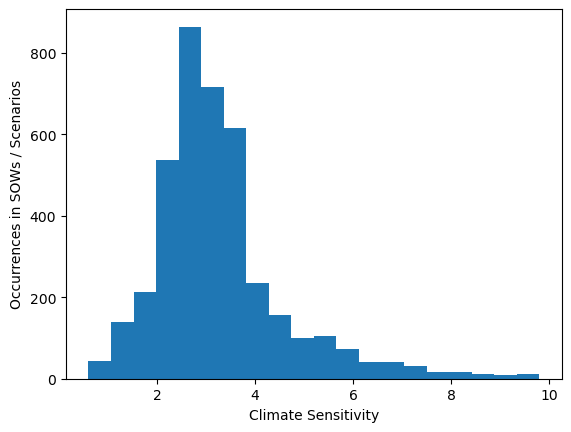

In [58]:
plt.hist(Xy['Clim_Sens'], bins=20)
plt.xlabel('Climate Sensitivity')
plt.ylabel('Occurrences in SOWs / Scenarios');
plt.savefig('../outputs/climate_sensitivity_hist.pdf')

Eg, let's look at the 10th and 90th percentile:

In [52]:
clim_sens_LB = np.percentile(Xy['Clim_Sens'], 10)
clim_sens_UB = np.percentile(Xy['Clim_Sens'], 90)
clim_sens_LB, clim_sens_UB

(2.0, 5.0)

In [53]:
Xy_clim_sens_filter = Xy[(clim_sens_LB <= Xy['Clim_Sens']) & (clim_sens_UB >= Xy['Clim_Sens'])]

In [54]:
Xy_clim_sens_filter.shape

(3204, 44)

In [55]:
Xy.shape

(3972, 44)

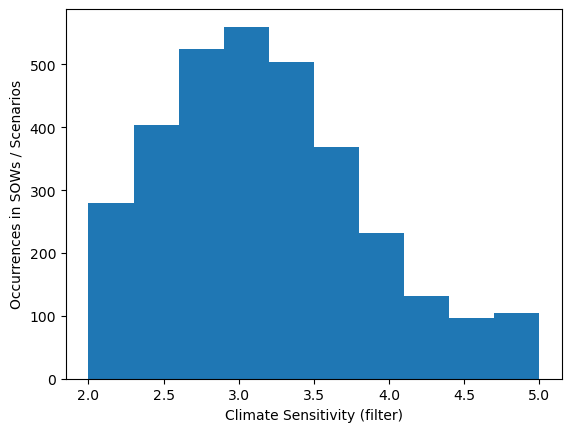

In [59]:
plt.hist(Xy_clim_sens_filter['Clim_Sens'])
plt.xlabel('Climate Sensitivity (filter)')
plt.ylabel('Occurrences in SOWs / Scenarios');
plt.savefig('../outputs/climate_sensitivity_filter_hist.pdf')

In [60]:
Xy_clim_sens_filter.to_csv("../outputs/data_XY_clim_sens_filter.csv")